<a href="https://colab.research.google.com/github/CamiloLoaiza12/Analitica2_trabajo1/blob/main/Selecci%C3%B3n_de_variables_y_regularizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [1]:
## Remove Warnings
import warnings
warnings.filterwarnings("ignore")

## Data
import pandas as pd
import numpy as np
from itertools import product

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Modelling
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score, classification_report
import math

In [2]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics

%matplotlib inline

In [3]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [4]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.datasets import make_classification
from collections import Counter

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

# Importacion de datos

In [5]:
tabla_base = pd.read_csv('tabla_base.csv', sep = ",")

In [6]:
tabla_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   desercion_año_anterior         4410 non-null   object 
 1   frecuencia_viajes              4410 non-null   object 
 2   departamento                   4410 non-null   object 
 3   distancia_domicilio            4410 non-null   int64  
 4   educacion                      4410 non-null   int64  
 5   formacion                      4410 non-null   object 
 6   nivel_de_cargo                 4410 non-null   int64  
 7   nombre_cargo                   4410 non-null   object 
 8   estado_civil                   4410 non-null   object 
 9   ingresos_mensuales             4410 non-null   int64  
 10  empresas_anteriores            4410 non-null   float64
 11  porcentaje_aumentosalario      4410 non-null   int64  
 12  nivel_de_opciones              4410 non-null   i

# Normalización

In [7]:
tablabase=tabla_base.copy()
columnascategoricas=["numero_capacitaciones","frecuencia_viajes"]
tablabase[columnascategoricas] = tablabase[columnascategoricas].astype(str)
tablabase.dtypes

desercion_año_anterior            object
frecuencia_viajes                 object
departamento                      object
distancia_domicilio                int64
educacion                          int64
formacion                         object
nivel_de_cargo                     int64
nombre_cargo                      object
estado_civil                      object
ingresos_mensuales                 int64
empresas_anteriores              float64
porcentaje_aumentosalario          int64
nivel_de_opciones                  int64
años_de_trabajo                  float64
numero_capacitaciones             object
años_jefe_actual                   int64
satisfaccion_entorno             float64
satisfaccion_laboral             float64
conciliacion_faimilar_laboral    float64
implicacion_laboral                int64
tiempo_prom_dia                  float64
dtype: object

In [8]:
tablabase["desercion"]=tablabase['desercion_año_anterior'].replace({'No':0, 'Yes':1})
del tablabase['desercion_año_anterior']
tablabase

,frecuencia_viajes,departamento,distancia_domicilio,educacion,formacion,nivel_de_cargo,nombre_cargo,estado_civil,ingresos_mensuales,empresas_anteriores,...,nivel_de_opciones,años_de_trabajo,numero_capacitaciones,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,implicacion_laboral,tiempo_prom_dia,desercion
0,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,Married,131160,1.0,...,0,1.0,6,0,3.0,4.0,2.0,3,6.8702,0
1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,Single,41890,0.0,...,1,6.0,3,4,3.0,2.0,4.0,2,7.3160,1
2,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,Married,193280,1.0,...,3,5.0,2,3,2.0,2.0,1.0,3,6.8161,0
3,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,Married,83210,3.0,...,3,13.0,5,5,4.0,4.0,3.0,2,6.7892,0
4,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,Single,23420,4.0,...,2,9.0,2,4,4.0,1.0,3.0,3,7.8776,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,Travel_Rarely,Research & Development,5,4,Medical,1,Research Scientist,Single,60290,3.0,...,1,10.0,5,2,4.0,1.0,3.0,3,8.3169,0
4406,Travel_Rarely,Research & Development,2,4,Medical,1,Laboratory Technician,Divorced,26790,2.0,...,0,10.0,2,2,4.0,4.0,3.0,2,5.8972,0
4407,Travel_Rarely,Research & Development,25,2,Life Sciences,2,Sales Executive,Married,37020,0.0,...,0,5.0,4,2,1.0,3.0,3.0,3,7.1495,0
4408,Travel_Rarely,Sales,18,2,Medical,1,Laboratory Technician,Divorced,23980,0.0,...,1,10.0,2,8,4.0,1.0,3.0,2,9.1876,0


In [9]:
tablabase1=pd.get_dummies(tablabase)
tablabase1

,distancia_domicilio,educacion,nivel_de_cargo,ingresos_mensuales,empresas_anteriores,porcentaje_aumentosalario,nivel_de_opciones,años_de_trabajo,años_jefe_actual,satisfaccion_entorno,...,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,numero_capacitaciones_0,numero_capacitaciones_1,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_4,numero_capacitaciones_5,numero_capacitaciones_6
0,6,2,1,131160,1.0,11,0,1.0,0,3.0,...,0,1,0,0,0,0,0,0,0,1
1,10,1,1,41890,0.0,23,1,6.0,4,3.0,...,0,0,1,0,0,0,1,0,0,0
2,17,4,4,193280,1.0,15,3,5.0,3,2.0,...,0,1,0,0,0,1,0,0,0,0
3,2,5,3,83210,3.0,11,3,13.0,5,4.0,...,0,1,0,0,0,0,0,0,1,0
4,10,1,1,23420,4.0,12,2,9.0,4,4.0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,5,4,1,60290,3.0,17,1,10.0,2,4.0,...,0,0,1,0,0,0,0,0,1,0
4406,2,4,1,26790,2.0,15,0,10.0,2,4.0,...,1,0,0,0,0,1,0,0,0,0
4407,25,2,2,37020,0.0,20,0,5.0,2,1.0,...,0,1,0,0,0,0,0,1,0,0
4408,18,2,1,23980,0.0,14,1,10.0,8,4.0,...,1,0,0,0,0,1,0,0,0,0


In [10]:
y=tablabase1["desercion"]
x=tablabase1.drop(["desercion"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

columnasenteras=["distancia_domicilio","educacion","nivel_de_cargo","ingresos_mensuales","porcentaje_aumentosalario","nivel_de_opciones","años_jefe_actual","implicacion_laboral"]
tablabase1[columnasenteras]=tablabase1[columnasenteras].astype(float)
columnasfloat=list(tablabase1.select_dtypes("float64").columns)
pipeline=ColumnTransformer([("num", StandardScaler(),columnasfloat)],remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

# Modelo base

## Modelo base sin balanceo de clases

In [15]:
# Entrenamiento del modelo
modelo = LogisticRegression()
# Ajustar el modelo a los datos
modelo.fit(X_train_std, y_train)
# Desempeño en el entrenamiento
y_train_pred = modelo.predict(X_train_std)
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred))

Exactitud en el entrenamiento: 0.862


In [16]:
y_pred = modelo.predict(X_test_std)
# Exactitud en el conjunto de validación
print('Exactitud en la validacion: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en la validacion: 0.851


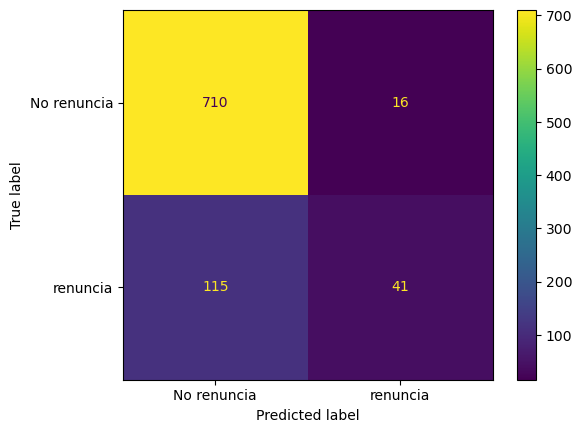

In [17]:
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

In [20]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.7192982456140351
Recall: 0.26282051282051283
Especificidad: 0.977961432506887
F1 score: 0.38497652582159625


In [15]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
print("R2: %.2f" % r2_score(y_test, y_pred))

# R2 ajustado
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.15
RMSE 0.38
MAE: 0.15
MAPE: 76591830397457.55
R2: -0.06
R2-adjusted: -0.12


## Modelo base con balaceno de clases

In [21]:
from sklearn.metrics import accuracy_score
X_train_std1=X_train_std.copy()
X_test_std1=X_test_std.copy()
# Entrenamiento del modelo
modelo1 = LogisticRegression(class_weight="balanced",random_state=142)

# Ajustar el modelo a los datos
modelo1.fit(X_train_std1, y_train)

# Desempeño en el entrenamiento
y_train_pred1 = modelo1.predict(X_train_std1)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred1) )

Exactitud en el entrenamiento: 0.755


In [22]:
y_pred1 = modelo1.predict(X_test_std1)

# Exactitud en el conjunto de validación
print('Exactitud en el validacion: %.3f'  %accuracy_score(y_test, y_pred1))

Exactitud en el validacion: 0.711


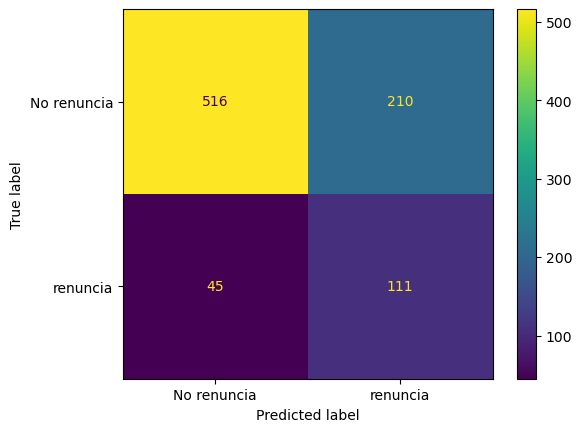

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz1= confusion_matrix(y_test, y_pred1)
matriz_display1 = ConfusionMatrixDisplay(confusion_matrix=matriz1, display_labels=['No renuncia', 'renuncia'])
matriz_display1.plot()
plt.show()

In [24]:
tn, fp, fn, tp = matriz1.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.34579439252336447
Recall: 0.7115384615384616
Especificidad: 0.7107438016528925
F1 score: 0.4654088050314465


In [20]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred1))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred1)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred1))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred1))
print("R2: %.2f" % r2_score(y_test, y_pred1))

# R2 ajustado
r2 = r2_score(y_test, y_pred1)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std1.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.27
RMSE 0.52
MAE: 0.27
MAPE: 1046755015431918.00
R2: -0.95
R2-adjusted: -1.06


# Balanceo de clases manual

In [25]:
os_us = SMOTETomek()
x_train_res, y_train_res = os_us.fit_resample(X_train_std, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({0: 2973, 1: 555})
Distribution after resampling Counter({0: 2973, 1: 2973})


# Seleccion de variables


## Metodo integrado 

In [27]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression,  f_classif, mutual_info_classif, chi2

In [28]:
# metodo integrado
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, Ridge

In [29]:

sel_ = SelectFromModel(Lasso(alpha = 0.001, max_iter=10000), max_features=30) #entre mas aumente el parametro de serializacion, mas variables van atender a 0
sel_.fit(X_train_std, y_train)
print(sel_.estimator_.coef_)
#Obtener variables seleccionadas
X_new = sel_.get_support()#descarta los coeficientes mas cercanos a 0
X_train_base1 = X_train_std[:,X_new]
X_test_base1= X_test_std[:,X_new]
X_train.iloc[:,X_new]

[ 0.         -0.01106301 -0.01108084 -0.00375446  0.03221716  0.00836352
  0.         -0.05328506 -0.02493944 -0.0411745  -0.04002483 -0.02175243
 -0.00450121  0.07195709 -0.05734431  0.10095859 -0.          0.06311189
 -0.         -0.          0.07900571  0.02161132 -0.          0.
 -0.00612766 -0.00040442 -0.01366254 -0.          0.00929093 -0.
 -0.05857216  0.05491966  0.01389304  0.02287749 -0.01925329 -0.01710018
 -0.          0.11008875  0.          0.          0.03489407  0.04574267
 -0.00328144 -0.00731964 -0.03871615]


,educacion,nivel_de_cargo,empresas_anteriores,porcentaje_aumentosalario,años_de_trabajo,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,implicacion_laboral,...,nombre_cargo_Research Director,nombre_cargo_Research Scientist,nombre_cargo_Sales Executive,nombre_cargo_Sales Representative,estado_civil_Divorced,estado_civil_Single,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_5,numero_capacitaciones_6
3436,2,5,0.0,11,3.0,2,2.0,4.0,2.0,3,...,0,0,0,1,0,1,0,1,0,0
1604,3,2,4.0,23,24.0,2,1.0,1.0,2.0,2,...,0,0,0,0,0,0,1,0,0,0
3917,4,3,4.0,20,13.0,3,3.0,4.0,2.0,3,...,0,0,1,0,1,0,0,0,0,0
1497,1,1,1.0,11,17.0,7,4.0,4.0,3.0,3,...,0,1,0,0,0,1,1,0,0,0
3807,1,1,1.0,22,6.0,3,1.0,4.0,4.0,3,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,3,2,1.0,14,7.0,7,4.0,3.0,1.0,2,...,0,0,0,0,0,1,0,1,0,0
1918,4,1,4.0,15,22.0,0,2.0,2.0,2.0,3,...,0,0,0,0,0,1,1,0,0,0
2470,4,2,1.0,13,1.0,0,4.0,1.0,3.0,3,...,0,0,0,1,1,0,0,1,0,0
1909,1,1,1.0,12,3.0,2,3.0,3.0,3.0,3,...,0,0,0,1,0,0,0,0,1,0


In [106]:
X_train.iloc[:,X_new].columns

Index(['educacion', 'nivel_de_cargo', 'empresas_anteriores',
       'porcentaje_aumentosalario', 'años_de_trabajo', 'años_jefe_actual',
       'satisfaccion_entorno', 'satisfaccion_laboral',
       'conciliacion_faimilar_laboral', 'implicacion_laboral',
       'tiempo_prom_dia', 'frecuencia_viajes_Non-Travel',
       'frecuencia_viajes_Travel_Frequently', 'departamento_Human Resources',
       'formacion_Human Resources', 'formacion_Life Sciences',
       'formacion_Other', 'nombre_cargo_Healthcare Representative',
       'nombre_cargo_Laboratory Technician',
       'nombre_cargo_Manufacturing Director', 'nombre_cargo_Research Director',
       'nombre_cargo_Research Scientist', 'nombre_cargo_Sales Executive',
       'nombre_cargo_Sales Representative', 'estado_civil_Divorced',
       'estado_civil_Single', 'numero_capacitaciones_2',
       'numero_capacitaciones_3', 'numero_capacitaciones_5',
       'numero_capacitaciones_6'],
      dtype='object')

## Método Wrapper 

In [108]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression

# Función recursiva de selección de características
def recursive_feature_selection(X,y,model,k):
  rfe = RFE(model, n_features_to_select=k, step=1)
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))
  return X_new  

In [109]:
# Establecer Estimador
model = LogisticRegression(max_iter=100)
# Obtener columnas seleciconadas - (30 caracteristicas)
X_new_class = recursive_feature_selection(X_train_std, y_train, model, 30)

# Nuevo conjunto de datos
X_train_base2 = X_train_std[:,X_new_class]
X_test_base2= X_test_std[:,X_new_class]
X_train.iloc[:,X_new_class]

Num Features: 30
Selected Features: [False False False False  True False False  True  True  True  True  True
 False  True  True  True False  True  True  True  True  True  True False
  True False False  True  True False  True  True  True  True False  True
  True  True False False  True  True  True  True  True]
Feature Ranking: [13  9  5 15  1  6 16  1  1  1  1  1 11  1  1  1 14  1  1  1  1  1  1 12
  1 10  4  1  1  3  1  1  1  1  2  1  1  1  8  7  1  1  1  1  1]


,empresas_anteriores,años_de_trabajo,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,tiempo_prom_dia,frecuencia_viajes_Non-Travel,frecuencia_viajes_Travel_Frequently,departamento_Human Resources,...,nombre_cargo_Research Scientist,nombre_cargo_Sales Executive,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_4,numero_capacitaciones_5,numero_capacitaciones_6
3436,0.0,3.0,2,2.0,4.0,2.0,7.2758,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1604,4.0,24.0,2,1.0,1.0,2.0,5.7120,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3917,4.0,13.0,3,3.0,4.0,2.0,9.1174,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1497,1.0,17.0,7,4.0,4.0,3.0,7.1388,0,0,0,...,1,0,0,0,1,1,0,0,0,0
3807,1.0,6.0,3,1.0,4.0,4.0,6.4059,0,1,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,1.0,7.0,7,4.0,3.0,1.0,6.1117,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1918,4.0,22.0,0,2.0,2.0,2.0,8.8102,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2470,1.0,1.0,0,4.0,1.0,3.0,5.9271,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1909,1.0,3.0,2,3.0,3.0,3.0,7.5161,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [110]:
X_train.iloc[:,X_new_class].columns

Index(['empresas_anteriores', 'años_de_trabajo', 'años_jefe_actual',
       'satisfaccion_entorno', 'satisfaccion_laboral',
       'conciliacion_faimilar_laboral', 'tiempo_prom_dia',
       'frecuencia_viajes_Non-Travel', 'frecuencia_viajes_Travel_Frequently',
       'departamento_Human Resources', 'departamento_Research & Development',
       'departamento_Sales', 'formacion_Human Resources',
       'formacion_Life Sciences', 'formacion_Marketing', 'formacion_Other',
       'nombre_cargo_Human Resources', 'nombre_cargo_Laboratory Technician',
       'nombre_cargo_Manufacturing Director', 'nombre_cargo_Research Director',
       'nombre_cargo_Research Scientist', 'nombre_cargo_Sales Executive',
       'estado_civil_Divorced', 'estado_civil_Married', 'estado_civil_Single',
       'numero_capacitaciones_2', 'numero_capacitaciones_3',
       'numero_capacitaciones_4', 'numero_capacitaciones_5',
       'numero_capacitaciones_6'],
      dtype='object')

# Modelo 1 de Regresión Logística

### Modelo 1 Regresion logistica con Lasso

In [32]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression(random_state=142, class_weight='balanced')

# Ajustar el modelo a los datos
modelo.fit(X_train_base1, y_train)

# Desempeño en el entrenamiento
y_train_pred2 = modelo.predict(X_train_base1)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred2) )

Exactitud en el entrenamiento: 0.751


In [33]:
y_pred = modelo.predict(X_test_base1)

# Exactitud en el conjunto de validación
print('Exactitud en la validacion: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en la validacion: 0.707


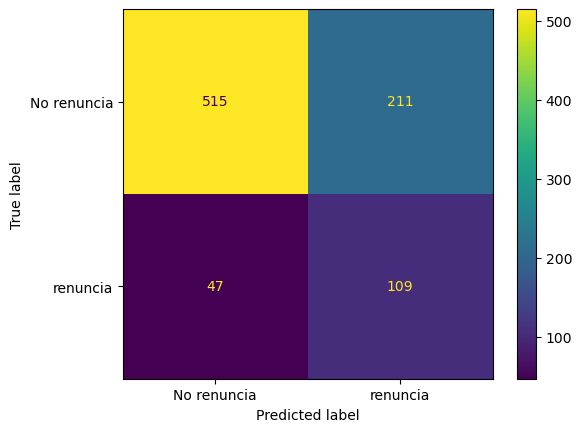

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

In [35]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.340625
Recall: 0.6987179487179487
Especificidad: 0.709366391184573
F1 score: 0.45798319327731096


In [35]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
print("R2: %.2f" % r2_score(y_test, y_pred))

# R2 ajustado
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std1.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.27
RMSE 0.52
MAE: 0.27
MAPE: 1051861137458415.12
R2: -0.94
R2-adjusted: -1.04


#### Optimizacion de hiperparametros

In [ ]:
# Definición de cuadricula de hiperparametros
parameters = {'max_depth': [0.5, 1, 3],
              'max_features': [0.01,0.05,0.4],
              'max_leaf_nodes': [4,7,9],
              'min_samples_leaf': [1,3,5],
              'n_estimators': [10, 20, 30, 40]}

### Modelo 1.1 regresion logistica con Wrapper

In [36]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression(random_state=142, class_weight='balanced')

# Ajustar el modelo a los datos
modelo.fit(X_train_base2, y_train)

# Desempeño en el entrenamiento
y_train_pred2 = modelo.predict(X_train_base2)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred2) )

Exactitud en el entrenamiento: 0.741


In [37]:
y_pred = modelo.predict(X_test_base2)

# Exactitud en el conjunto de validación
print('Exactitud en la validacion: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en la validacion: 0.703


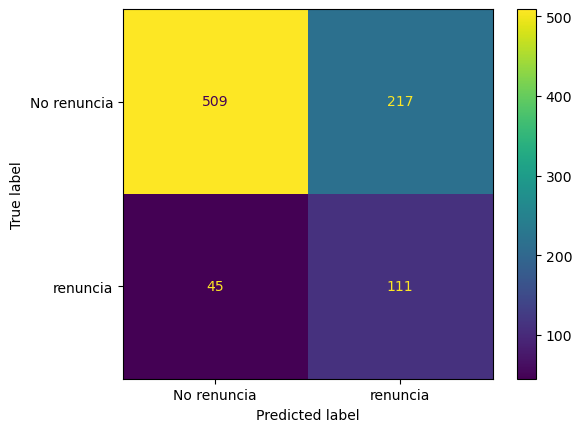

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

In [39]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.3384146341463415
Recall: 0.7115384615384616
Especificidad: 0.7011019283746557
F1 score: 0.45867768595041325


In [40]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
print("R2: %.2f" % r2_score(y_test, y_pred))

# R2 ajustado
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std1.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.28
RMSE 0.53
MAE: 0.28
MAPE: 1072285625564403.75
R2: -1.01
R2-adjusted: -1.12


### Modelo 1.2 regresion logistica con balanceo de clases manual

In [40]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression(random_state=142)

# Ajustar el modelo a los datos
modelo.fit(x_train_res, y_train_res)

# Desempeño en el entrenamiento
y_train_pred2 = modelo.predict(x_train_res)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train_res, y_train_pred2) )

Exactitud en el entrenamiento: 0.773


In [42]:
y_pred = modelo.predict(X_test_std)

# Exactitud en el conjunto de validación
print('Exactitud en la validacion: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en la validacion: 0.705


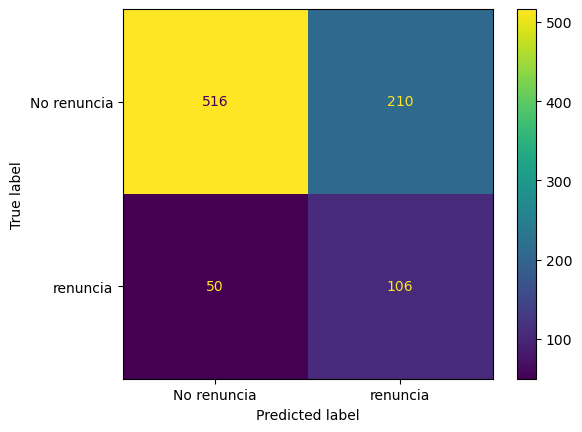

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

In [44]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.33544303797468356
Recall: 0.6794871794871795
Especificidad: 0.7107438016528925
F1 score: 0.4491525423728814


# Modelo 2 Random Forest Classifier

### 3.1 Modelo random forest con metodo integrado

In [46]:
from sklearn.ensemble import RandomForestClassifier
X_train_modelo3=X_train_base1
X_test_modelo3=X_test_base1

ranfor = RandomForestClassifier(class_weight="balanced",n_estimators = 150,criterion= 'gini', max_depth= 5,max_leaf_nodes = 10,n_jobs= -1,random_state = 123)
ranfor.fit(X_train_modelo3, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       n_estimators=150, n_jobs=-1, random_state=123)

In [47]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train_modelo3)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train_modelo3)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test_modelo3)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test_modelo3)))

Train - Accuracy : 0.808390022675737
Train - classification report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      2973
           1       0.44      0.77      0.56       555

    accuracy                           0.81      3528
   macro avg       0.69      0.79      0.72      3528
weighted avg       0.87      0.81      0.83      3528

Test - Accuracy : 0.7811791383219955
Test - classification report :               precision    recall  f1-score   support

           0       0.93      0.79      0.86       726
           1       0.43      0.73      0.54       156

    accuracy                           0.78       882
   macro avg       0.68      0.76      0.70       882
weighted avg       0.84      0.78      0.80       882



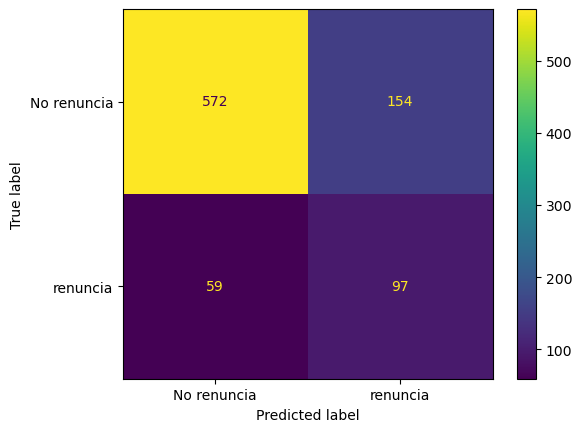

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm= confusion_matrix(y_test, ranfor.predict(X_test_modelo3))
# Visualización de la matriz de confusion
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['No renuncia', 'renuncia'])
cm_display.plot()
plt.show()

#### Modelo con tuning de hiperparametros

In [152]:
# Definición de cuadricula de hiperparametros
parameters = {'max_depth': [ 1, 3, 5, 7],
              'max_features': [0.05,0.4, 1],
              'max_leaf_nodes': [4,7,9, 15],
              'min_samples_leaf': [0.5, 1,3,5],
              'n_estimators': [10, 20, 30, 40]}

In [153]:
#Definición del modelo
ranfor = RandomForestClassifier(random_state = 123)

grid_search = GridSearchCV(ranfor, parameters, scoring='r2', cv=5, n_jobs=-1)

# Iniciamos la busqueda
grid_result = grid_search.fit(X_train_modelo3, y_train)

print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'max_depth': 5, 'max_features': 0.4, 'max_leaf_nodes': 15, 'min_samples_leaf': 3, 'n_estimators': 10}
Best Score:  -0.009212298624063541


In [154]:
from sklearn.ensemble import RandomForestClassifier
X_train_modelo3=X_train_base1
X_test_modelo3=X_test_base1

ranfor = RandomForestClassifier(class_weight="balanced", max_features=0.4, n_estimators = 10, max_depth= 5,max_leaf_nodes = 15, min_samples_leaf=3, n_jobs= -1,random_state = 123)
ranfor.fit(X_train_modelo3, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=0.4,
                       max_leaf_nodes=15, min_samples_leaf=3, n_estimators=10,
                       n_jobs=-1, random_state=123)

In [155]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train_modelo3)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train_modelo3)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test_modelo3)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test_modelo3)))

Train - Accuracy : 0.8129251700680272
Train - classification report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88      2973
           1       0.44      0.73      0.55       555

    accuracy                           0.81      3528
   macro avg       0.69      0.78      0.72      3528
weighted avg       0.86      0.81      0.83      3528

Test - Accuracy : 0.7857142857142857
Test - classification report :               precision    recall  f1-score   support

           0       0.93      0.80      0.86       726
           1       0.43      0.70      0.54       156

    accuracy                           0.79       882
   macro avg       0.68      0.75      0.70       882
weighted avg       0.84      0.79      0.80       882



### 3.2 Modelo random forest con metodo wrapper

In [53]:
from sklearn.ensemble import RandomForestClassifier
X_train_modelo3_2=X_train_base2
X_test_modelo3_2=X_test_base2

ranfor = RandomForestClassifier(class_weight="balanced",n_estimators = 150,criterion= 'gini', max_depth= 5,max_leaf_nodes = 10,n_jobs= -1,random_state = 123)
ranfor.fit(X_train_modelo3_2, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       n_estimators=150, n_jobs=-1, random_state=123)

In [54]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train_modelo3_2)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train_modelo3_2)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test_modelo3_2)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test_modelo3_2)))

Train - Accuracy : 0.8132086167800453
Train - classification report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88      2973
           1       0.44      0.74      0.55       555

    accuracy                           0.81      3528
   macro avg       0.69      0.78      0.72      3528
weighted avg       0.87      0.81      0.83      3528

Test - Accuracy : 0.782312925170068
Test - classification report :               precision    recall  f1-score   support

           0       0.93      0.79      0.86       726
           1       0.43      0.72      0.54       156

    accuracy                           0.78       882
   macro avg       0.68      0.76      0.70       882
weighted avg       0.84      0.78      0.80       882



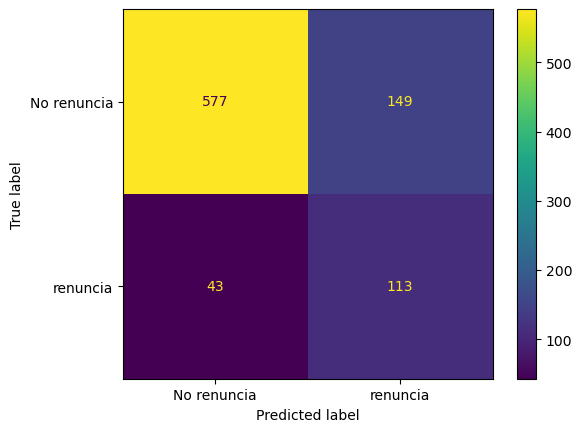

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm= confusion_matrix(y_test, ranfor.predict(X_test_modelo3_2))
# Visualización de la matriz de confusion
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,  display_labels=['No renuncia', 'renuncia'])
cm_display.plot()
plt.show()

# Modelo 3 Gradient Boosting Classifier

### 4.1 Modelo de Gradient Boosting con metodo integrado

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
X_train_modelo4= x_train_res[:, X_new]
X_test_modelo4 = X_test_std[:, X_new]
gboos = GradientBoostingClassifier( n_estimators = 100, learning_rate= 0.1, max_features = 4, random_state = 123)
gboos.fit(X_train_modelo4, y_train_res)

GradientBoostingClassifier(max_features=4, random_state=123)

In [102]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train_res, gboos.predict(X_train_modelo4)))
print ("Train - classification report:\n", metrics.classification_report(y_train_res, gboos.predict(X_train_modelo4)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos.predict(X_test_modelo4)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos.predict(X_test_modelo4)))

Train - Accuracy : 0.9098553649512278
Train - classification report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      2973
           1       0.92      0.89      0.91      2973

    accuracy                           0.91      5946
   macro avg       0.91      0.91      0.91      5946
weighted avg       0.91      0.91      0.91      5946

Test - Accuracy : 0.8367346938775511
Test - classification report :               precision    recall  f1-score   support

           0       0.90      0.90      0.90       726
           1       0.54      0.54      0.54       156

    accuracy                           0.84       882
   macro avg       0.72      0.72      0.72       882
weighted avg       0.84      0.84      0.84       882



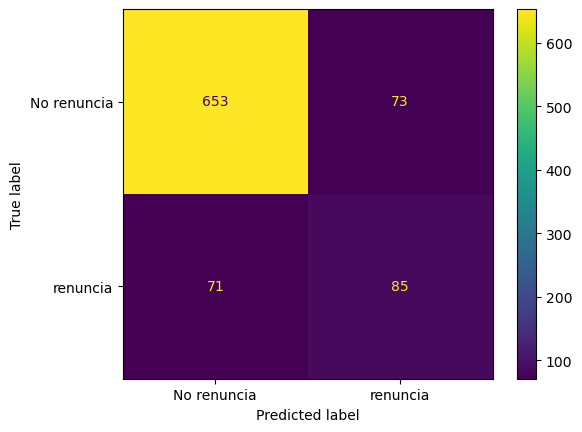

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, gboos.predict(X_test_modelo4))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1,  display_labels=['No renuncia', 'renuncia'])
cm1_display.plot()
plt.show()

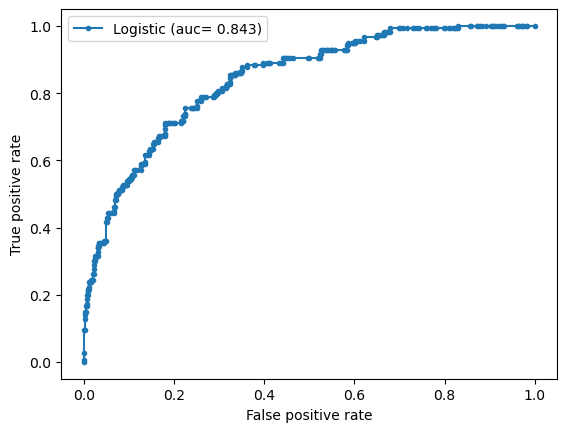

In [104]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred = gboos.predict_proba(X_test_modelo4)[::,1]
fpr, tpr,_ =roc_curve(y_test, y_pred)
# auc=auc(fpr, tpr) #opción 1
auc = roc_auc_score(y_test, y_pred) #opción 2
plt.plot(fpr, tpr,marker='.',label='Logistic (auc= %0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

#### Modelo con tunning de hiperparametros

In [68]:
# Definición de cuadricula de hiperparametros
parameters = {'learning_rate': [0.05, 0.1,0.3],
              'max_features': [2, 4, 6, 8],
              'max_depth': [4,6,8,10,12],
              'n_estimators': [80, 100, 150, 200]}

In [70]:
#Definición del modelo
from sklearn.ensemble import GradientBoostingClassifier
ranfor = GradientBoostingClassifier(random_state = 123)

grid_search = GridSearchCV(ranfor, parameters, scoring='r2', cv=5, n_jobs=-1)

# Iniciamos la busqueda
grid_result = grid_search.fit(X_train_modelo4, y_train_res)

print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'learning_rate': 0.3, 'max_depth': 12, 'max_features': 2, 'n_estimators': 150}
Best Score:  0.9721792178642341


In [78]:
from sklearn.ensemble import GradientBoostingClassifier
X_train_modelo4= x_train_res[:, X_new]
X_test_modelo4 = X_test_std [:, X_new]
gboos = GradientBoostingClassifier( n_estimators = 150, max_depth= 12, learning_rate= 0.3, max_features = 2, random_state = 123)
gboos.fit(X_train_modelo4, y_train_res)

GradientBoostingClassifier(learning_rate=0.3, max_depth=12, max_features=2,
                           n_estimators=150, random_state=123)

In [79]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train_res, gboos.predict(X_train_modelo4)))
print ("Train - classification report:\n", metrics.classification_report(y_train_res, gboos.predict(X_train_modelo4)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos.predict(X_test_modelo4)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos.predict(X_test_modelo4)))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2973
           1       1.00      1.00      1.00      2973

    accuracy                           1.00      5946
   macro avg       1.00      1.00      1.00      5946
weighted avg       1.00      1.00      1.00      5946

Test - Accuracy : 0.9897959183673469
Test - classification report :               precision    recall  f1-score   support

           0       0.99      1.00      0.99       726
           1       0.98      0.96      0.97       156

    accuracy                           0.99       882
   macro avg       0.99      0.98      0.98       882
weighted avg       0.99      0.99      0.99       882



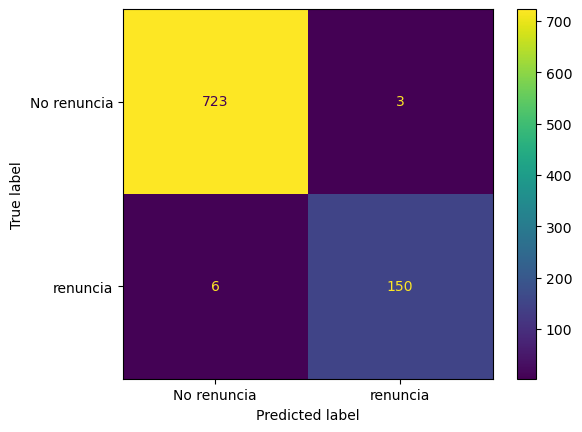

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, gboos.predict(X_test_modelo4))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1,  display_labels=['No renuncia', 'renuncia'])
cm1_display.plot()
plt.show()

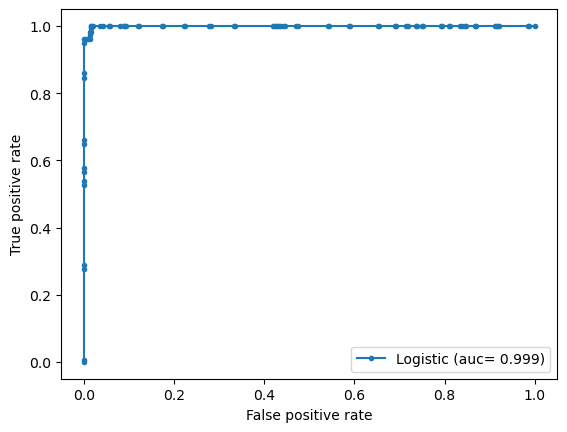

In [82]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred = gboos.predict_proba(X_test_modelo4)[::,1]
fpr, tpr,_ =roc_curve(y_test, y_pred)
# auc=auc(fpr, tpr) #opción 1
auc = roc_auc_score(y_test, y_pred) #opción 2
plt.plot(fpr, tpr,marker='.',label='Logistic (auc= %0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

### 4.2 Modelo de Gradient Boosting con metodo wrapper

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
X_train_modelo4_2= x_train_res[:, X_new_class]
X_test_modelo4_2 = X_test_std[:, X_new_class]
gboos = GradientBoostingClassifier( n_estimators = 100, learning_rate= 0.1, max_features = 4, random_state = 123)
gboos.fit(X_train_modelo4_2, y_train_res)

GradientBoostingClassifier(max_features=4, random_state=123)

In [63]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train_res, gboos.predict(X_train_modelo4_2)))
print ("Train - classification report:\n", metrics.classification_report(y_train_res, gboos.predict(X_train_modelo4_2)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos.predict(X_test_modelo4_2)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos.predict(X_test_modelo4_2)))

Train - Accuracy : 0.9076690211907165
Train - classification report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      2973
           1       0.91      0.90      0.91      2973

    accuracy                           0.91      5946
   macro avg       0.91      0.91      0.91      5946
weighted avg       0.91      0.91      0.91      5946

Test - Accuracy : 0.8492063492063492
Test - classification report :               precision    recall  f1-score   support

           0       0.93      0.89      0.91       726
           1       0.56      0.67      0.61       156

    accuracy                           0.85       882
   macro avg       0.74      0.78      0.76       882
weighted avg       0.86      0.85      0.85       882



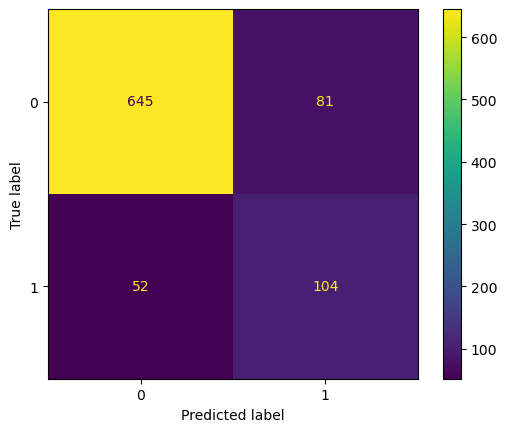

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, gboos.predict(X_test_modelo4_2))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1,  display_labels=['No renuncia', 'renuncia'])
cm1_display.plot()
plt.show()

# Modelo 4 Support Vector Machine 

### 5.1 Modelo de support vector machine con metodo integrado

In [65]:
from sklearn.svm import SVC
X_train_modelo5=X_train_base1
X_test_modelo5=X_test_base1
svm_model = SVC(C = 1.5, kernel = 'linear', class_weight = 'balanced', max_iter =-1, random_state=123)
svm_model.fit(X_train_modelo5, y_train)

SVC(C=1.5, class_weight='balanced', kernel='linear', random_state=123)

In [66]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, svm_model.predict(X_train_modelo5)))
print ("Train - classification report:\n", metrics.classification_report(y_train, svm_model.predict(X_train_modelo5)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, svm_model.predict(X_test_modelo5)))
print ("Test - classification report :", metrics.classification_report(y_test, svm_model.predict(X_test_modelo5)))

Train - Accuracy : 0.7491496598639455
Train - classification report:
               precision    recall  f1-score   support

           0       0.95      0.74      0.83      2973
           1       0.36      0.78      0.49       555

    accuracy                           0.75      3528
   macro avg       0.65      0.76      0.66      3528
weighted avg       0.85      0.75      0.78      3528

Test - Accuracy : 0.7142857142857143
Test - classification report :               precision    recall  f1-score   support

           0       0.92      0.71      0.80       726
           1       0.35      0.71      0.47       156

    accuracy                           0.71       882
   macro avg       0.63      0.71      0.64       882
weighted avg       0.82      0.71      0.75       882



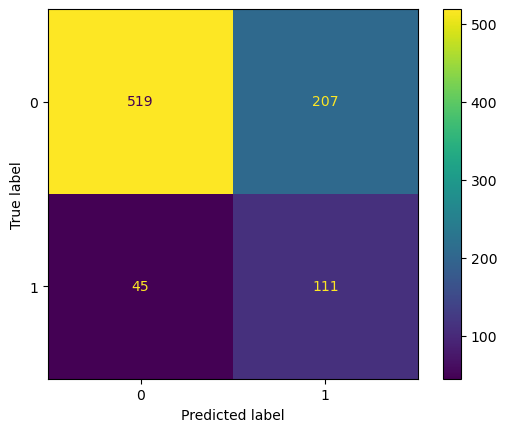

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, svm_model.predict(X_test_modelo5))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1,  display_labels=['No renuncia', 'renuncia'])
cm1_display.plot()
plt.show()

#### Model support vector machine con hiperparametros optimizados

In [148]:
# Definición de cuadricula de hiperparametros
parameters = {'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
              'C': [-1,0.01, 0.08, 1.5, 3], 
              'max_iter': [-1, 0.08, 1, 5, 10],} 

In [149]:
#Definición del modelo
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
ranfor = SVC(random_state = 123)

grid_search = GridSearchCV(ranfor, parameters, scoring='r2', cv=5, n_jobs=-1)

# Iniciamos la busqueda
grid_result = grid_search.fit(X_train_modelo5, y_train)

print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'C': 3, 'kernel': 'rbf', 'max_iter': -1}
Best Score:  0.6108508967332495


In [150]:
from sklearn.svm import SVC
X_train_modelo5=X_train_base1
X_test_modelo5=X_test_base1
svm_model = SVC(C = 3, kernel = 'rbf', class_weight = 'balanced', max_iter =-1, random_state=123)
svm_model.fit(X_train_modelo5, y_train)

SVC(C=3, class_weight='balanced', random_state=123)

In [145]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, svm_model.predict(X_train_modelo5)))
print ("Train - classification report:\n", metrics.classification_report(y_train, svm_model.predict(X_train_modelo5)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, svm_model.predict(X_test_modelo5)))
print ("Test - classification report :", metrics.classification_report(y_test, svm_model.predict(X_test_modelo5)))

Train - Accuracy : 0.15731292517006804
Train - classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2973
           1       0.16      1.00      0.27       555

    accuracy                           0.16      3528
   macro avg       0.08      0.50      0.14      3528
weighted avg       0.02      0.16      0.04      3528

Test - Accuracy : 0.17687074829931973
Test - classification report :               precision    recall  f1-score   support

           0       0.00      0.00      0.00       726
           1       0.18      1.00      0.30       156

    accuracy                           0.18       882
   macro avg       0.09      0.50      0.15       882
weighted avg       0.03      0.18      0.05       882



###  5.2 Modelo support vector machine con metodo wrapper


In [70]:
from sklearn.svm import SVC
X_train_modelo5_2=X_train_base2
X_test_modelo5_2=X_test_base2
svm_model = SVC(C = 1.5, kernel = 'linear', class_weight = 'balanced', max_iter =-1, random_state=123)
svm_model.fit(X_train_modelo5_2, y_train)

SVC(C=1.5, class_weight='balanced', kernel='linear', random_state=123)

In [71]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, svm_model.predict(X_train_modelo5_2)))
print ("Train - classification report:\n", metrics.classification_report(y_train, svm_model.predict(X_train_modelo5_2)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, svm_model.predict(X_test_modelo5_2)))
print ("Test - classification report :", metrics.classification_report(y_test, svm_model.predict(X_test_modelo5_2)))

Train - Accuracy : 0.7417800453514739
Train - classification report:
               precision    recall  f1-score   support

           0       0.95      0.74      0.83      2973
           1       0.35      0.77      0.49       555

    accuracy                           0.74      3528
   macro avg       0.65      0.76      0.66      3528
weighted avg       0.85      0.74      0.77      3528

Test - Accuracy : 0.7029478458049887
Test - classification report :               precision    recall  f1-score   support

           0       0.92      0.70      0.79       726
           1       0.34      0.74      0.47       156

    accuracy                           0.70       882
   macro avg       0.63      0.72      0.63       882
weighted avg       0.82      0.70      0.74       882



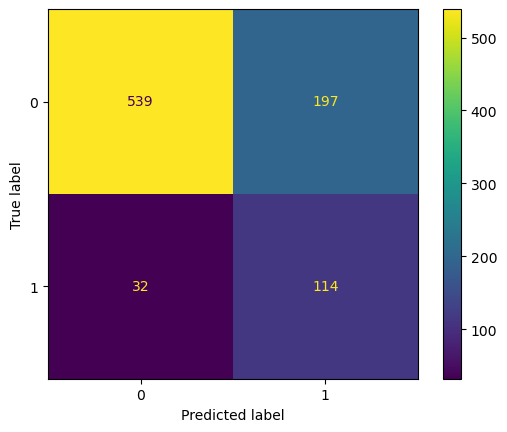

In [120]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, svm_model.predict(X_test_modelo5_2))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels=['No renuncia', 'renuncia'])
cm1_display.plot()
plt.show()

# CONCLUSIONES

![Alt text](<WhatsApp Image 2023-09-25 at 5.21.12 PM.jpeg>)